# Market Segmentation Analysis Case study:Fast food
   ## Sweta Patil| patilspatil460@gmail.com

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer

In [ ]:
# Load McDonalds data
# Assuming you have a CSV file of the McDonalds dataset
mcdonalds = pd.read_csv('mcdonalds.csv')
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [ ]:
# Data overview
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
# Convert categorical 'Yes'/'No' to binary matrix for selected columns
MD_x = (mcdonalds.iloc[:, 1:12] == "Yes").astype(int)

In [ ]:
print(pd.isnull(mcdonalds).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [ ]:
mcdonalds['yummy'].value_counts()

,count
yummy,
Yes,803
No,650


In [ ]:
mcdonalds['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
I hate it!-5,152
I love it!+5,143
-3,73
-4,71


In [ ]:
# Column means
print(MD_x.mean().round(2))

convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
Like          0.00
dtype: float64


In [ ]:
#For convinence renaming the category
mcdonalds['Like']= mcdonalds['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

In [ ]:
# Extract relevant columns
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1, "No" to 0
MD_x = (MD_x == "Yes").astype(int)
# Calculating and rounding the column means
columnMeans = np.round(MD_x.mean(), 2)
columnHeadings = mcdonalds.columns

# Printing the column headings with the corresponding rounded column means
result = dict(zip(columnHeadings, columnMeans))
print(result)

{'yummy': 0.55, 'convenient': 0.91, 'spicy': 0.09, 'fattening': 0.87, 'greasy': 0.53, 'fast': 0.9, 'cheap': 0.6, 'tasty': 0.64, 'expensive': 0.36, 'healthy': 0.2, 'disgusting': 0.24}


In [ ]:
# PCA on binary matrix
pca = PCA()
MD_pca = pca.fit(MD_x)
print(pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


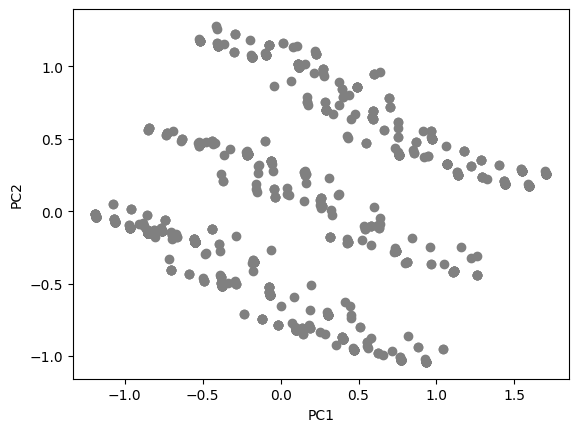

In [ ]:
# Plot PCA
plt.scatter(pca.transform(MD_x)[:, 0], pca.transform(MD_x)[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 4.1 Using k-Means

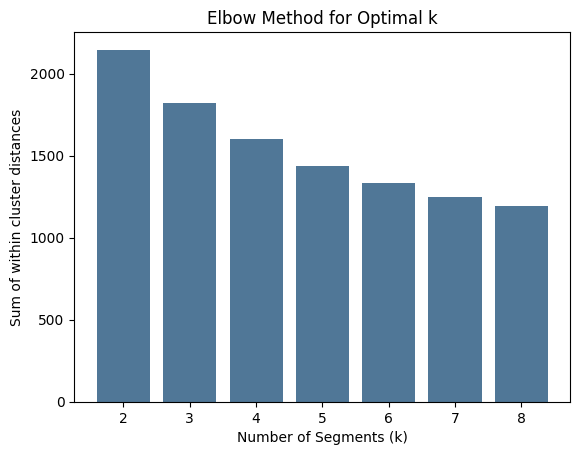

In [ ]:

# Perform k-means clustering with k values from 2 to 8
k_values = range(2, 9)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.bar(k_values, inertia_values, color='#063e6b', alpha=0.7)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Sum of within cluster distances')
plt.show()

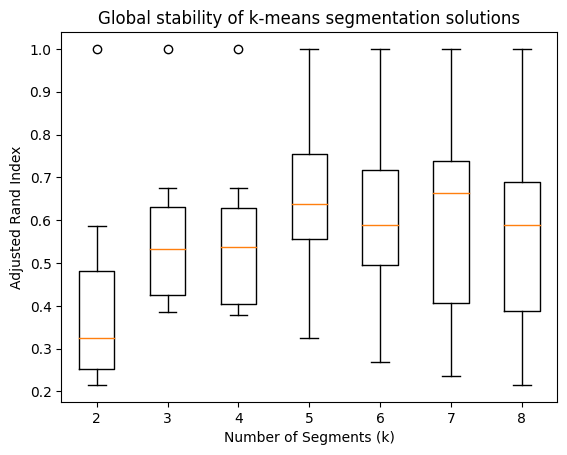

In [ ]:
# Performing k-Means clustering for k values ranging from 2 to 8
results = {}
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_labels = kmeans_model.fit_predict(MD_x)
    results[str(k)] = kmeans_labels
    mcdonalds['Cluster Number'] = kmeans_labels

# Calculating adjusted rand index for each k value
ari_values = []
for k1 in range(2, 9):
    ari_values.append([adjusted_rand_score(results[str(k1)], results[str(k2)]) for k2 in range(2, 9)])

# Convert ari_values to a NumPy array for easier plotting
ari_values = np.array(ari_values)

# Create a box plot
plt.boxplot(ari_values.T, labels=list(range(2, 9)))
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Global stability of k-means segmentation solutions')
plt.show()

In [ ]:
# KMeans clustering with step (2 to 8 clusters)
kmeans_models = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in range(2, 9)]
wcss = [model.inertia_ for model in kmeans_models]

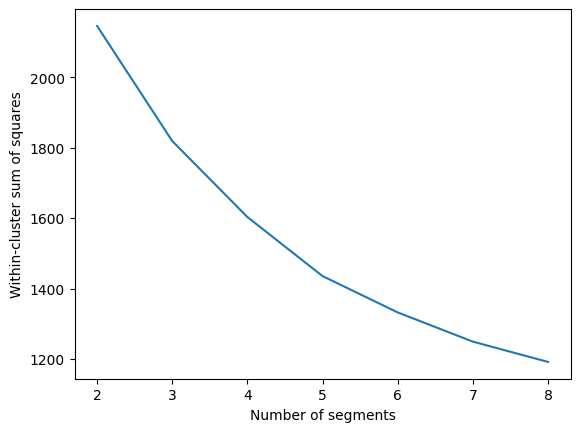

In [ ]:
# Plot WCSS to determine optimal clusters
plt.plot(range(2, 9), wcss)
plt.xlabel("Number of segments")
plt.ylabel("Within-cluster sum of squares")
plt.show()

In [ ]:
# Flexmix equivalent (GaussianMixture for binary data)
gmm_models = [GaussianMixture(n_components=k, random_state=1234).fit(MD_x) for k in range(2, 9)]

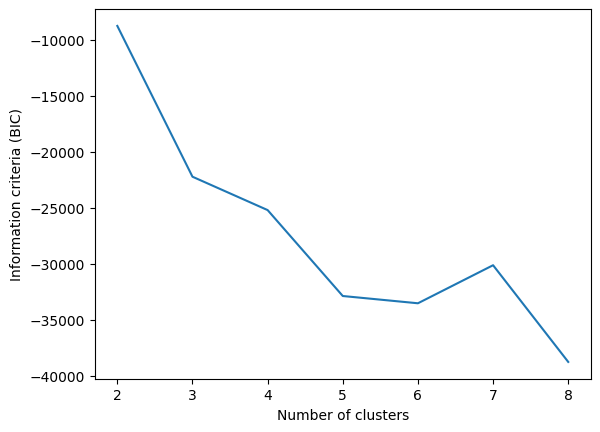

In [ ]:
# Plot information criteria
bic = [model.bic(MD_x) for model in gmm_models]
plt.plot(range(2, 9), bic, label='BIC')
plt.xlabel("Number of clusters")
plt.ylabel("Information criteria (BIC)")
plt.show()

# 4.2 Using Mixtures of Distributions

In [ ]:
columns = ["iter", "converged", "k", "k0", "logLik", "AIC", "BIC"]
results = pd.DataFrame(columns=columns)
X = np.array(MD_x)

In [ ]:
# Perform Latent Class Analysis (LCA) using Gaussian Mixture Model
for k in range(2, 9):
    lca_model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    lca_model.fit(X)

    # Get log-likelihood and other metrics
    log_likelihood = lca_model.score(X)
    aic = lca_model.aic(X)
    bic = lca_model.bic(X)


In [ ]:
 # Append the results to the DataFrame
results = results.append({"iter": lca_model.n_iter_,"converged": True, "k": k, "k0": k, "logLik": log_likelihood, "AIC": aic,"BIC":bic},ignore_index=True)
print(results)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Latent Class Analysis using Gaussian Mixture Model
aicValues = []
bicValues = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    model.fit(MD_x)
    aicValues.append(model.aic(MD_x))
    bicValues.append(model.bic(MD_x))

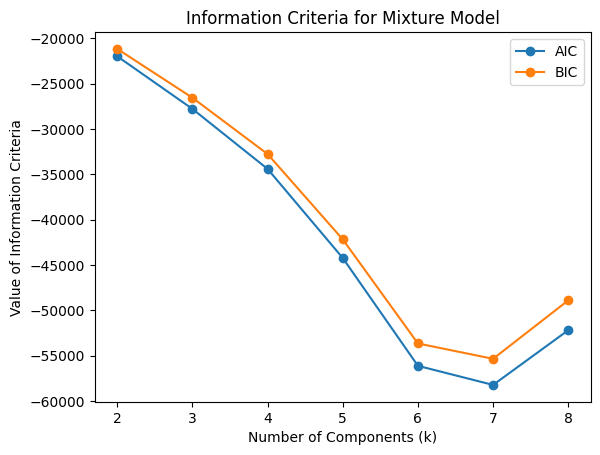

In [ ]:
# Plot information criteria
plt.plot(range(2, 9), aicValues, label='AIC', marker='o')
plt.plot(range(2, 9), bicValues, label='BIC', marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.title('Information Criteria for Mixture Model')
plt.show()

In [ ]:
# Select the model for k=4
selected_model = GaussianMixture(n_components=4, n_init=10, random_state=1234)
selected_model.fit(MD_x)

# Cross-tabulation of clusters from k-means and the mixture model
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MD_x)

cluster_comparison = pd.crosstab(index=kmeans_labels, columns=selected_model.predict(MD_x), rownames=['kmeans'], colnames=['mixture'])
print(cluster_comparison)

mixture    0    1    2    3
kmeans                     
0         31   51  268   14
1          4  214    0   22
2        143    0  362   28
3          0    3    0  313


In [ ]:
logLikelihood = selected_model.score_samples(MD_x)
print(f'Log Likelihood: {logLikelihood.sum()}')

Log Likelihood: 17513.541902228542


# 5. Profiling Segments

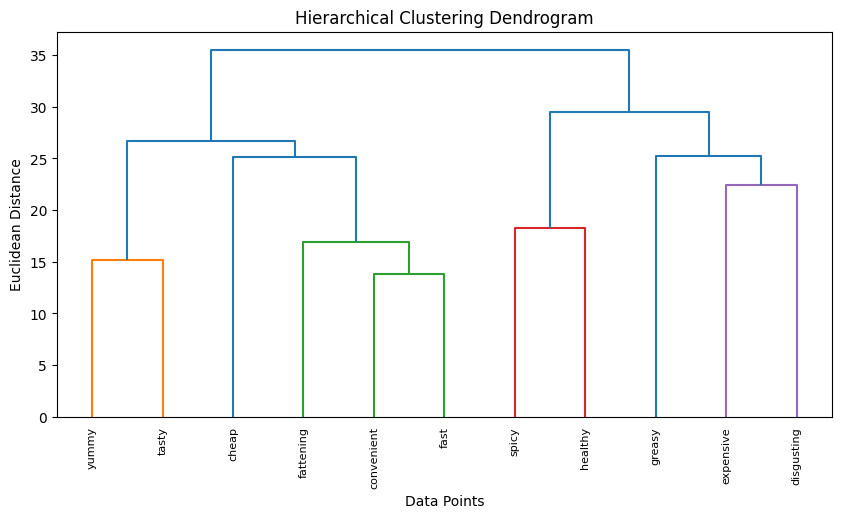

In [ ]:
# Perform hierarchical clustering
MD_vclust = linkage(MD_x.transpose(), method='complete')

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 5))
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


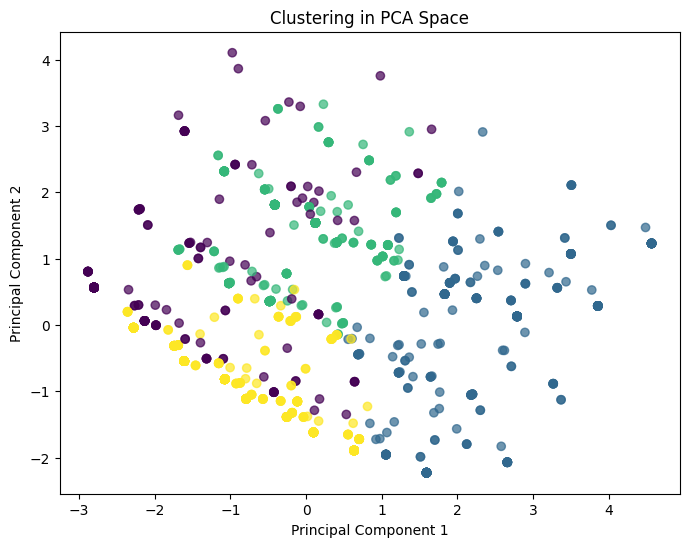

[[-0.40695508 -0.30882741 -0.02332033  0.17786071  0.26779582 -0.21303906
  -0.28913434 -0.42611499  0.29094445 -0.26683857  0.41074387]
 [ 0.28261487 -0.04568172  0.0699822  -0.20559024 -0.13630029 -0.28244059
  -0.57503178  0.24219851  0.56752776  0.20103082 -0.14388846]]


In [ ]:
# Standardize the data
scaler = StandardScaler()
MD_x_standardized = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_standardized)

# Perform clustering (KMeans with k=4 for illustration)
kmeansModel = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeansModel.fit_predict(MD_x_standardized)

# Visualize clustering in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering in PCA Space")
plt.show()

# Project axes (MD.pca)
print(pca.components_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


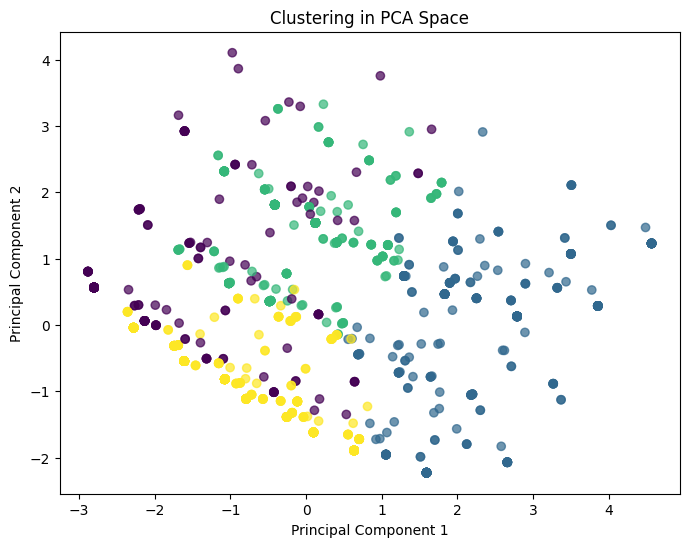

[[-0.40695508 -0.30882741 -0.02332033  0.17786071  0.26779582 -0.21303906
  -0.28913434 -0.42611499  0.29094445 -0.26683857  0.41074387]
 [ 0.28261487 -0.04568172  0.0699822  -0.20559024 -0.13630029 -0.28244059
  -0.57503178  0.24219851  0.56752776  0.20103082 -0.14388846]]


In [ ]:
# Standardize the data
scaler = StandardScaler()
MD_x_standardized = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_standardized)

# Perform clustering (KMeans with k=4 for illustration)
kmeansModel = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeansModel.fit_predict(MD_x_standardized)

# Visualize clustering in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering in PCA Space")
plt.show()

# Project axes (MD.pca)
print(pca.components_)

# 6. Describing Segments

In [ ]:
crosstab =pd.crosstab(mcdonalds['Cluster Number'],mcdonalds['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
Cluster Number,,,,,,,,,,,
0,5,3,6,4,5,17,25,27,37,19,20
1,11,16,20,17,17,41,19,22,15,1,0
2,0,0,1,0,2,4,9,12,30,25,31
3,69,24,19,13,9,26,7,4,4,0,0
4,2,2,3,7,14,27,33,45,46,42,35
5,1,1,1,4,2,11,13,28,25,22,17
6,62,22,21,12,5,15,7,6,1,0,0
7,2,3,2,2,4,28,39,43,71,51,40


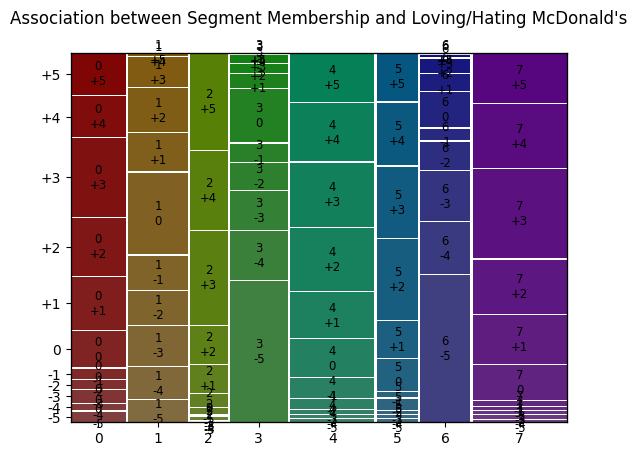

In [ ]:
#Creating a mosaic plots
mosaic(crosstab.stack(), title='Association between Segment Membership and Loving/Hating McDonald\'s\n')
plt.show()

In [ ]:
GenderCrossTab = pd.crosstab(mcdonalds['Cluster Number'],mcdonalds['Gender'])
GenderCrossTab

Gender,Female,Male
Cluster Number,,
0,84,84
1,98,81
2,62,52
3,75,100
4,149,107
5,59,66
6,87,64
7,174,111


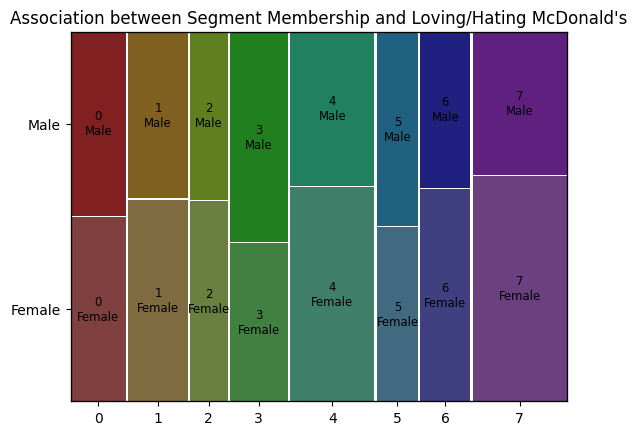

In [ ]:
mosaic(GenderCrossTab.stack(), title='Association between Segment Membership and Loving/Hating McDonald\'s')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster Number', y='Age', data=mcdonalds)
plt.xlabel('Cluster Number')
plt.ylabel('Age')
plt.title('Bar Plot of Age by Cluster Number')
plt.show()

# 7. Selecting (the) Target Segment(s)

In [ ]:
#Calculating the mean for

In [ ]:
#1. Visit frequency
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visitFreq = mcdonalds.groupby('Cluster Number')['VisitFrequency'].mean()
visitFreq = visitFreq.to_frame().reset_index()
visitFreq

,Cluster Number,VisitFrequency
0,0,2.583333
1,1,2.692737
2,2,2.491228
3,3,2.674286
4,4,2.656250
5,5,2.648000
6,6,2.774834
7,7,2.578947


In [ ]:
#2.Like
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
like = mcdonalds.groupby('Cluster Number')['Like'].mean()
like = like.to_frame().reset_index()
like

,Cluster Number,Like
0,0,3.380952
1,1,5.692737
2,2,2.877193
3,3,7.662857
4,4,3.281250
5,5,3.040000
6,6,7.523179
7,7,3.038596


In [ ]:
#3.Gender
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
gender = mcdonalds.groupby('Cluster Number')['Gender'].mean()
gender = gender.to_frame().reset_index()
gender

,Cluster Number,Gender
0,0,0.500000
1,1,0.452514
2,2,0.456140
3,3,0.571429
4,4,0.417969
5,5,0.528000
6,6,0.423841
7,7,0.389474


In [ ]:
clusters = gender.merge(like, on='Cluster Number', how='left').merge(visitFreq, on='Cluster Number', how='left')
clusters

,Cluster Number,Gender,Like,VisitFrequency
0,0,0.500000,3.380952,2.583333
1,1,0.452514,5.692737,2.692737
2,2,0.456140,2.877193,2.491228
3,3,0.571429,7.662857,2.674286
4,4,0.417969,3.281250,2.656250
5,5,0.528000,3.040000,2.648000
6,6,0.423841,7.523179,2.774834
7,7,0.389474,3.038596,2.578947


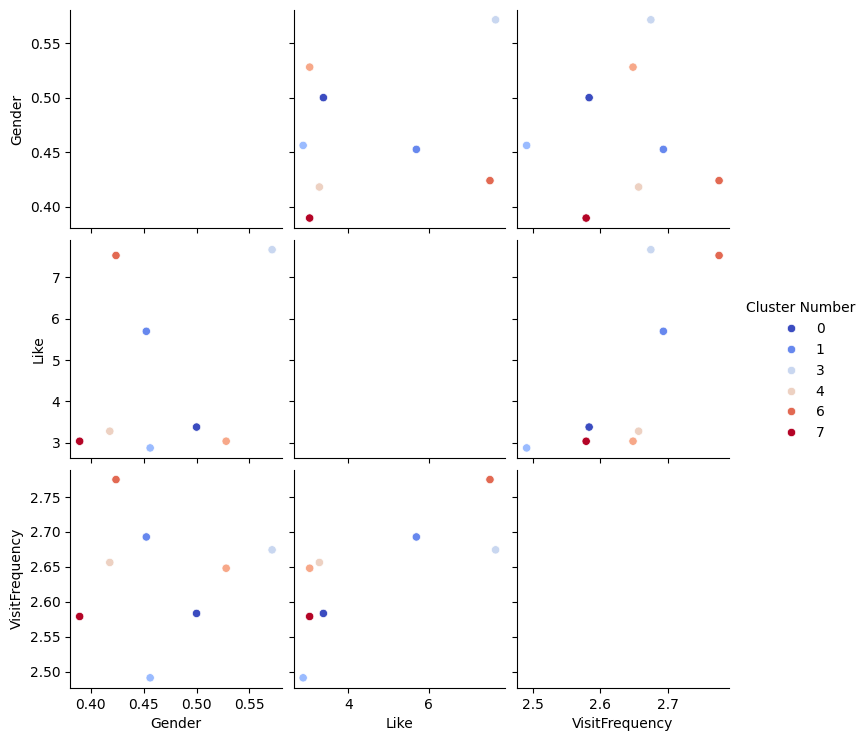

In [ ]:
sns.pairplot(clusters, hue='Cluster Number', palette='coolwarm')
plt.show()

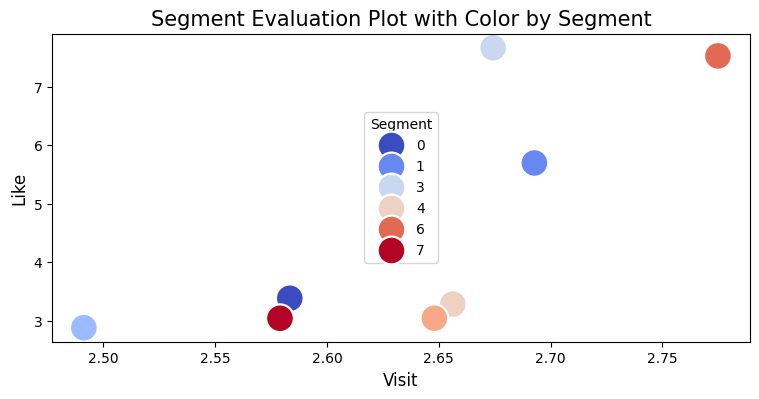

In [ ]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=clusters, s=400, hue='Cluster Number', palette='coolwarm')
plt.title("Segment Evaluation Plot with Color by Segment", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.legend(title='Segment', loc='center')
plt.show()

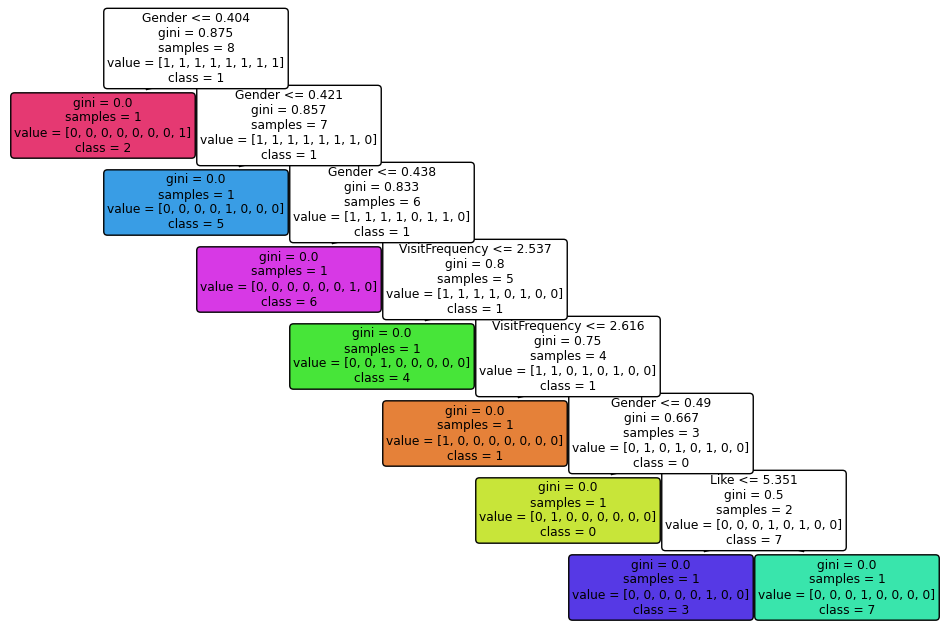

In [ ]:
mcdonalds['Gender'] = mcdonalds['Gender'].map({'Male': 0, 'Female': 1})
# Extract features and target variable
features = ['Like', 'VisitFrequency', 'Gender']
target = 'Cluster Number'

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(clusters[['Like', 'VisitFrequency', 'Gender']]), columns=['Like', 'VisitFrequency', 'Gender'])


# Separate features and target variable
X = data_imputed[features]  # Use the imputed data
y = clusters[target]

# Create a decision tree
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=[str(i) for i in mcdonalds[target].unique()], filled=True, rounded=True)
plt.show()

In [ ]:
print(data_imputed.columns)
print(mcdonalds['Cluster Number'].nunique())
print(len(features))